# Stage 1 plots, plot section A: Plot relationships among cor, heritability, genomic features, DNA methylation

## Load coremarks, heritability datasets

### Load

In [1]:
library(data.table)
coremarks <- fread("50-OUT/50-INTERMEDIATE_coremarks_to_format.csv")

heritability <- fread("50-OUT/50-INTERMEDIATE_step10_heritability_combined_wide.csv")

# Load necessary library
library(data.table)

# -----------------------------
# 1. Prepare the Mapping Table
# -----------------------------

# Create a named vector for find-and-replace with updated formatting
replacement_mapping <- c(
  # E071: Hippocampus Middle
  "E071_15_coreMarks_mnemonics|feature:1_TssA" = "Active TSS (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:10_TssBiv" = "Bivalent TSS (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:11_BivFlnk" = "Bivalent Flanking Region (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:12_EnhBiv" = "Bivalent Enhancer (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:13_ReprPC" = "Repressive Polycomb (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:14_ReprPCWk" = "Weak Repressive Polycomb (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:15_Quies" = "Quiescent (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:2_TssAFlnk" = "Flanking Active TSS (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:3_TxFlnk" = "Transcribed Flanking Region (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:4_Tx" = "Strong Transcription (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:5_TxWk" = "Weak Transcription (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:6_EnhG" = "Genic Enhancer (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:7_Enh" = "Enhancer (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:8_ZNF/Rpts" = "ZNF Repetitive Elements (Hippocampus Middle)",
  "E071_15_coreMarks_mnemonics|feature:9_Het" = "Heterochromatin (Hippocampus Middle)",
  # E068: Anterior Caudate
  "E068_15_coreMarks_mnemonics|feature:1_TssA" = "Active TSS (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:10_TssBiv" = "Bivalent TSS (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:11_BivFlnk" = "Bivalent Flanking Region (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:12_EnhBiv" = "Bivalent Enhancer (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:13_ReprPC" = "Repressive Polycomb (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:14_ReprPCWk" = "Weak Repressive Polycomb (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:15_Quies" = "Quiescent (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:2_TssAFlnk" = "Flanking Active TSS (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:3_TxFlnk" = "Transcribed Flanking Region (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:4_Tx" = "Strong Transcription (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:5_TxWk" = "Weak Transcription (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:6_EnhG" = "Genic Enhancer (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:7_Enh" = "Enhancer (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:8_ZNF/Rpts" = "ZNF Repetitive Elements (Anterior Caudate)",
  "E068_15_coreMarks_mnemonics|feature:9_Het" = "Heterochromatin (Anterior Caudate)",
  # E073: DLPFC
  "E073_15_coreMarks_mnemonics|feature:1_TssA" = "Active TSS (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:10_TssBiv" = "Bivalent TSS (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:11_BivFlnk" = "Bivalent Flanking Region (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:12_EnhBiv" = "Bivalent Enhancer (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:13_ReprPC" = "Repressive Polycomb (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:14_ReprPCWk" = "Weak Repressive Polycomb (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:15_Quies" = "Quiescent (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:2_TssAFlnk" = "Flanking Active TSS (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:3_TxFlnk" = "Transcribed Flanking Region (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:4_Tx" = "Strong Transcription (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:5_TxWk" = "Weak Transcription (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:6_EnhG" = "Genic Enhancer (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:7_Enh" = "Enhancer (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:8_ZNF/Rpts" = "ZNF Repetitive Elements (DLPFC)",
  "E073_15_coreMarks_mnemonics|feature:9_Het" = "Heterochromatin (DLPFC)"
)

# -----------------------------
# 1B. Perform the Find and Replace
# -----------------------------

# Perform the replacement
coremarks[, feature := replacement_mapping[Feature_INFO]]
coremarks[, chr_cg := paste0(chr, "_", cg)]

coremarks[, chr_cg := paste0(chr, "_", cg)]

# -----------------------------
# 2. Create 'count_final' Data.table
# -----------------------------

# **Purpose:**
# - Summarize counts of unique 'chr_cg' per 'feature'.
# - Count total unique 'chr_cg' and those with Pval_* <= 0.05 for each brain region.

# Define brain regions
brain_regions <- c("caud", "dlpfc", "hippo")

# -----------------------------
# 2. Calculate Total CpG Sites Tested (`N_total`)
# -----------------------------



### Clean

In [11]:
# Total number of unique CpG sites tested for heritability
N_total <- uniqueN(heritability$chr_cg)
bonf <- 0.05 / N_total

In [12]:
N_total

[1] 24535150

In [3]:
# Create 'count_final' by summarizing 'coremarks'
count_final <- coremarks[, .(
  total_CpGs_overlapping_feature = uniqueN(chr_cg), # This is the total number of methylation sites that overlap with features.
  caud_heritable = uniqueN(chr_cg[Pval_caud <= bonf]),
  dlpfc_heritable = uniqueN(chr_cg[Pval_dlpfc <= bonf]),
  hippo_heritable = uniqueN(chr_cg[Pval_hippo <= bonf])
), by = feature]

In [4]:
heritability[, chr_cg := paste0(chr, "_", cg)]

In [5]:
colnames(count_final)[2:5] <- c("total_CpGs_overlapping_feature",
                                 "caud_heritable",
                                 "dlpfc_heritable",
                                 "hippo_heritable")

In [6]:
count_final

feature,total_CpGs_overlapping_feature,caud_heritable,dlpfc_heritable,hippo_heritable
<chr>,<int>,<int>,<int>,<int>
Bivalent TSS (DLPFC),137066,135342,134385,135354
Bivalent Flanking Region (Hippocampus Middle),138566,136659,136332,137176
Weak Repressive Polycomb (Anterior Caudate),1565071,1532272,1534984,1543000
Bivalent Enhancer (Hippocampus Middle),83010,82008,81556,82045
Repressive Polycomb (Hippocampus Middle),294283,288308,287274,290309
Repressive Polycomb (DLPFC),245169,240833,239617,241762
Weak Repressive Polycomb (Hippocampus Middle),2370653,2321992,2324273,2336065
Weak Repressive Polycomb (DLPFC),2008216,1964124,1965666,1979243
Repressive Polycomb (Anterior Caudate),171165,168479,168003,169016


In [9]:
dim(heritability)

[1] 24535150       15

In [13]:
head(heritability)

chr,cg,V_G_Vp_caud,SE_V_G_Vp_caud,Pval_caud,n_caud,V_G_Vp_dlpfc,SE_V_G_Vp_dlpfc,Pval_dlpfc,n_dlpfc,V_G_Vp_hippo,SE_V_G_Vp_hippo,Pval_hippo,n_hippo,chr_cg
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1069461,1e-06,0.018944,0.5,297,1e-06,0.055024,0.5,163,0.001690,0.013338,0.44274,178,1_1069461
1,1069467,1e-06,0.019105,0.5,297,1e-06,0.059936,0.5,163,0.001226,0.012695,0.45768,178,1_1069467
1,1069470,1e-06,0.019186,0.5,297,1e-06,0.062771,0.5,163,0.000994,0.012372,0.46536,178,1_1069470
1,1069477,1e-06,0.019386,0.5,297,1e-06,0.070604,0.5,163,0.000454,0.011619,0.48383,178,1_1069477
1,1069484,1e-06,0.007995,0.5,297,2e-06,0.089671,0.5,163,0.000001,0.012782,0.50000,178,1_1069484
1,1069498,1e-06,0.008194,0.5,297,3e-06,0.105596,0.5,163,0.000001,0.013529,0.50000,178,1_1069498


##### Figure Old-1a: geom-freq h2 by significance

Significance computed by Bonferroni threshold with number of total CpG sites over which heritability was tested

How to compute Bonferroni for each brain region? First, find NA for each. Total - NA for each

In [18]:
library(data.table)

# Suppose your data is in a data.table called dt

# 1. Compute the NA count for each column:
na_counts <- heritability[, lapply(.SD, function(x) sum(is.na(x)))]

# 2. Compute the non-NA count for each column:
non_na_counts <- heritability[, lapply(.SD, function(x) sum(!is.na(x)))]

# 3. Melt both results to get a long-format table:
na_table <- melt(na_counts, measure.vars = names(na_counts),
                 variable.name = "Column", value.name = "NA_Count")
non_na_table <- melt(non_na_counts, measure.vars = names(non_na_counts),
                     variable.name = "Column", value.name = "non_NA_Count")

# 4. Merge the two tables:
final_table <- merge(na_table, non_na_table, by = "Column")

# 5. Compute the bonf column as 0.05 divided by non_NA_Count:
final_table[, bonf := 0.05 / non_NA_Count]

# Display the final table:
final_table

Column,NA_Count,non_NA_Count,bonf
<fct>,<int>,<int>,<dbl>
chr,0,24535150,2.037893e-09
cg,0,24535150,2.037893e-09
V_G_Vp_caud,492976,24042174,2.079679e-09
SE_V_G_Vp_caud,493454,24041696,2.079720e-09
Pval_caud,492976,24042174,2.079679e-09
n_caud,492976,24042174,2.079679e-09
V_G_Vp_dlpfc,441169,24093981,2.075207e-09
SE_V_G_Vp_dlpfc,441248,24093902,2.075214e-09
Pval_dlpfc,441169,24093981,2.075207e-09


In [19]:
head(heritability)

chr,cg,V_G_Vp_caud,SE_V_G_Vp_caud,Pval_caud,n_caud,V_G_Vp_dlpfc,SE_V_G_Vp_dlpfc,Pval_dlpfc,n_dlpfc,V_G_Vp_hippo,SE_V_G_Vp_hippo,Pval_hippo,n_hippo,chr_cg
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1069461,1e-06,0.018944,0.5,297,1e-06,0.055024,0.5,163,0.001690,0.013338,0.44274,178,1_1069461
1,1069467,1e-06,0.019105,0.5,297,1e-06,0.059936,0.5,163,0.001226,0.012695,0.45768,178,1_1069467
1,1069470,1e-06,0.019186,0.5,297,1e-06,0.062771,0.5,163,0.000994,0.012372,0.46536,178,1_1069470
1,1069477,1e-06,0.019386,0.5,297,1e-06,0.070604,0.5,163,0.000454,0.011619,0.48383,178,1_1069477
1,1069484,1e-06,0.007995,0.5,297,2e-06,0.089671,0.5,163,0.000001,0.012782,0.50000,178,1_1069484
1,1069498,1e-06,0.008194,0.5,297,3e-06,0.105596,0.5,163,0.000001,0.013529,0.50000,178,1_1069498


In [20]:
# Extract the Bonferroni thresholds for each p-value column
thresh_caud <- final_table[Column == "Pval_caud", bonf]
thresh_dlpfc <- final_table[Column == "Pval_dlpfc", bonf]
thresh_hippo <- final_table[Column == "Pval_hippo", bonf]

# Add new columns to heritability indicating significance for each region
heritability[, signif_caud := Pval_caud < thresh_caud]
heritability[, signif_dlpfc := Pval_dlpfc < thresh_dlpfc]
heritability[, signif_hippo := Pval_hippo < thresh_hippo]

# Check the updated data.table
head(heritability)

chr,cg,V_G_Vp_caud,SE_V_G_Vp_caud,Pval_caud,n_caud,V_G_Vp_dlpfc,SE_V_G_Vp_dlpfc,Pval_dlpfc,n_dlpfc,V_G_Vp_hippo,SE_V_G_Vp_hippo,Pval_hippo,n_hippo,chr_cg,signif_caud,signif_dlpfc,signif_hippo
<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<lgl>,<lgl>,<lgl>
1,1069461,1e-06,0.018944,0.5,297,1e-06,0.055024,0.5,163,0.001690,0.013338,0.44274,178,1_1069461,FALSE,FALSE,FALSE
1,1069467,1e-06,0.019105,0.5,297,1e-06,0.059936,0.5,163,0.001226,0.012695,0.45768,178,1_1069467,FALSE,FALSE,FALSE
1,1069470,1e-06,0.019186,0.5,297,1e-06,0.062771,0.5,163,0.000994,0.012372,0.46536,178,1_1069470,FALSE,FALSE,FALSE
1,1069477,1e-06,0.019386,0.5,297,1e-06,0.070604,0.5,163,0.000454,0.011619,0.48383,178,1_1069477,FALSE,FALSE,FALSE
1,1069484,1e-06,0.007995,0.5,297,2e-06,0.089671,0.5,163,0.000001,0.012782,0.50000,178,1_1069484,FALSE,FALSE,FALSE
1,1069498,1e-06,0.008194,0.5,297,3e-06,0.105596,0.5,163,0.000001,0.013529,0.50000,178,1_1069498,FALSE,FALSE,FALSE


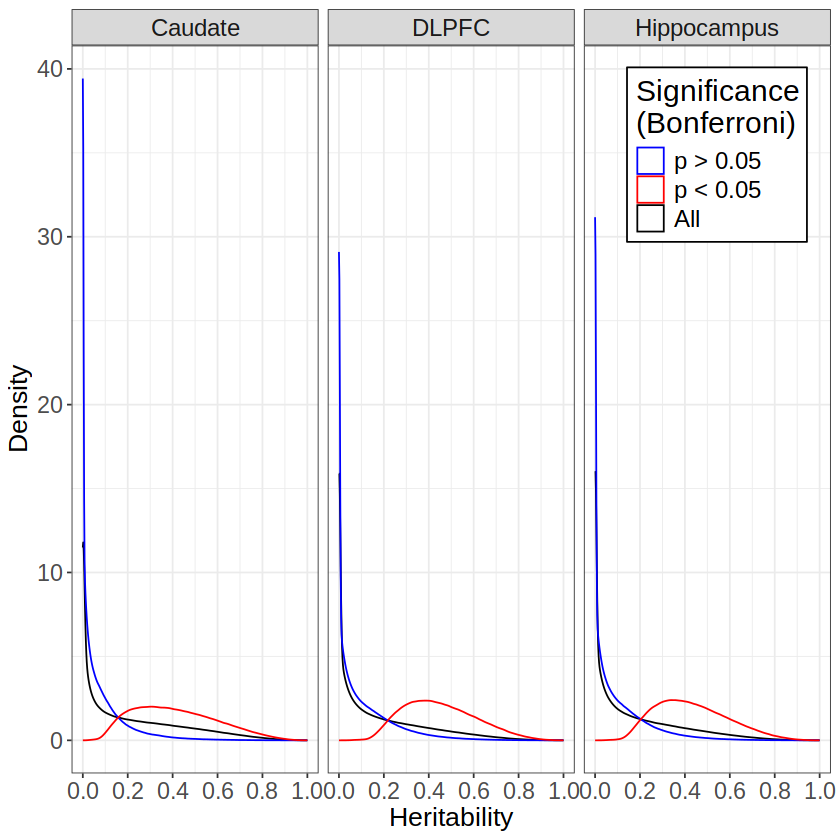

In [28]:
library(data.table)
library(ggplot2)

# Suppose your main data.table is called `heritability` and you have:
# V_G_Vp_caud, Pval_caud, signif_caud
# V_G_Vp_dlpfc, Pval_dlpfc, signif_dlpfc
# V_G_Vp_hippo, Pval_hippo, signif_hippo

# 1) Reshape your data into a "long" format.
df_caud <- heritability[, .(
  region       = "caud",
  heritability = V_G_Vp_caud,
  signif       = signif_caud
)]
df_dlpfc <- heritability[, .(
  region       = "dlpfc",
  heritability = V_G_Vp_dlpfc,
  signif       = signif_dlpfc
)]
df_hippo <- heritability[, .(
  region       = "hippo",
  heritability = V_G_Vp_hippo,
  signif       = signif_hippo
)]
df_long <- rbind(df_caud, df_dlpfc, df_hippo)

# Convert 'signif' to character so we can add an extra category
df_long[, signif := as.character(signif)]

# Create a copy of the data with all rows, labeled as "All"
df_all <- copy(df_long)
df_all[, signif := "All"]

# Combine the two datasets so that each region now has density curves for 
# "p < 0.05", "p > 0.05", and "All"
df_combined <- rbind(df_long, df_all)

# Create a labeller to rename the regions
region_labels <- c("caud"   = "Caudate",
                   "dlpfc"  = "DLPFC",
                   "hippo"  = "Hippocampus")

# 2) Create the plot with shared y-axes, custom legend title (with line break),
#    a black border around the legend, and capitalized "Density" on the y-axis.
p <- ggplot(df_combined, aes(x = heritability, color = signif)) +
  geom_density(na.rm = TRUE) +
  facet_wrap(~ region, ncol = 3, scales = "fixed", labeller = as_labeller(region_labels)) +
  scale_color_manual(
    breaks = c("FALSE", "TRUE", "All"),
    labels = c("p > 0.05", "p < 0.05", "All"),
    values = c("FALSE" = "blue", "TRUE" = "red", "All" = "black")
  ) +
  scale_x_continuous(breaks = c(0.0, 0.2, 0.4, 0.6, 0.8, 1.0)) +
  theme_bw() +
  theme(
    text             = element_text(size = 18),
    axis.title       = element_text(size = 16),
    axis.text        = element_text(size = 14),
    legend.position  = c(0.85, 0.85),  # Moves the legend inside the plot area
    legend.background = element_rect(fill = "white", color = "black")
  ) +
  labs(x = "Heritability", y = "Density", color = "Significance\n(Bonferroni)")

# Display the plot in Jupyter
print(p)

# 3) Create directories if they don't exist and save the plot
if(!dir.exists("polish_plots/plot_outputs")){
  dir.create("polish_plots/plot_outputs", recursive = TRUE)
}

ggsave(filename = "polish_plots/plot_outputs/oldstyle-Fig1A.png",
       plot     = p,
       width    = 10,
       height   = 6,
       dpi      = 300)

In [29]:
# Number of unique CpG sites with features
N_total_CpGs_overlapping_any_feature <- uniqueN(coremarks$chr_cg)

In [15]:
N_total_CpGs_overlapping_any_feature

[1] 22824979

In [16]:
N_total

[1] 0

In [17]:
# Number of CpG sites per feature
N_CpGs_overlapping_each_feature <- coremarks[, .(N_feature = uniqueN(chr_cg)), by = feature]

In [18]:
head(N_CpGs_overlapping_each_feature)

feature,N_feature
<chr>,<int>
Bivalent TSS (DLPFC),137066
Bivalent Flanking Region (Hippocampus Middle),138566
Weak Repressive Polycomb (Anterior Caudate),1565071
Bivalent Enhancer (Hippocampus Middle),83010
Repressive Polycomb (Hippocampus Middle),294283
Repressive Polycomb (DLPFC),245169


Let's sanity check N_CpGs_overlapping_each_feature

In [19]:
test <- coremarks[which(coremarks$feature == "Bivalent TSS (DLPFC)"), ]

In [20]:
dim(test)

[1] 137066     48

In [ ]:
# Number of significant CpG sites per feature and brain region
N_sig_feature_region <- coremarks[, .(
  caud = uniqueN(chr_cg[Pval_caud <= bonf]),
  dlpfc = uniqueN(chr_cg[Pval_dlpfc <= bonf]),
  hippo = uniqueN(chr_cg[Pval_hippo <= bonf])
), by = feature]

# Number of significant CpG sites without features per brain region
N_sig_no_feature_region <- data.table(
  caud = N_sig_region$caud - N_sig_features_region$caud,
  dlpfc = N_sig_region$dlpfc - N_sig_features_region$dlpfc,
  hippo = N_sig_region$hippo - N_sig_features_region$hippo
)

In [ ]:
N_sig_no_feature_region

In [ ]:
# -----------------------------
# 6. Combine Counts into `count_final`
# -----------------------------

# Create `count_final` Data.table with feature counts
count_final <- merge(N_CpGs_overlapping_each_feature, N_sig_feature_region, by = "feature")

# Add 'No Feature' category
no_feature_counts <- data.table(
  feature = "No Feature",
  N_feature = N_no_feature,
  caud = N_sig_no_feature_region$caud,
  dlpfc = N_sig_no_feature_region$dlpfc,
  hippo = N_sig_no_feature_region$hippo
)

# Append 'No Feature' to `count_final`
count_final2 <- rbind(count_final, no_feature_counts, fill = TRUE)

In [ ]:
N_total

In [ ]:
# -----------------------------
# 7. Calculate Background Frequencies and Expected Counts
# -----------------------------

# Calculate background frequency for each feature
# This is the frequency whether heritable or not.
# N_feature represents N_CpGs_overlapping_each_feature (regardless whether heritable or not)
# N_total represents total CpGs whether overlapping with feature or not (regardless whether heritable or not)
count_final[, background_freq := N_feature / N_total]

In [ ]:
count_final

In [ ]:
N_sig_region

## Up to here

To find the observed frequency....

In [ ]:
# We need to know how many CpG sites are heritable in given region, and also overlap with a feature.

In [ ]:
nrow(coremarks[which(coremarks$feature == "Quiescent (DLPFC)" & coremarks$Pval_caud <= bonf), ])

In [ ]:
count_final[which(count_final$feature == "Quiescent (DLPFC)"), ]

In [ ]:
# test 
nrow(coremarks[which(coremarks$feature == "Quiescent (DLPFC)" & coremarks$Pval_caud <= bonf), ])/
nrow(heritability[which(heritability$Pval_caud <= bonf), ])

In [ ]:
test <- coremarks[which(coremarks$feature == "Bivalent TSS (DLPFC)"), ]

In [ ]:
# Calculate observed proportions for each brain region
# N sig region represents # Total number of significant CpG sites per brain region, whether or not they overlap with a feature
# so here, the numerator is the number of heritable (for given region) CpGs that overlap with a feature, out of all heritable CpGs whether or not they overlap with a feature.
count_final[, Observed_Prop_caud := caud / N_sig_region$caud]
count_final[, Observed_Prop_dlpfc := dlpfc / N_sig_region$dlpfc]
count_final[, Observed_Prop_hippo := hippo / N_sig_region$hippo]

In [ ]:
# Expected proportions are the background frequencies
count_final[, Expected_Prop := background_freq]

# Calculate expected counts per brain region
count_final[, Expected_Count_caud := Expected_Prop * N_sig_region$caud]
count_final[, Expected_Count_dlpfc := Expected_Prop * N_sig_region$dlpfc]
count_final[, Expected_Count_hippo := Expected_Prop * N_sig_region$hippo]

In [ ]:
# -----------------------------
# 8. Calculate Fold Enrichment
# -----------------------------

# Fold enrichment based on proportions
count_final[, Fold_Enrichment_prop_caud := Observed_Prop_caud / Expected_Prop]
count_final[, Fold_Enrichment_prop_dlpfc := Observed_Prop_dlpfc / Expected_Prop]
count_final[, Fold_Enrichment_prop_hippo := Observed_Prop_hippo / Expected_Prop]

# Fold enrichment based on counts
count_final[, Fold_Enrichment_count_caud := caud / Expected_Count_caud]
count_final[, Fold_Enrichment_count_dlpfc := dlpfc / Expected_Count_dlpfc]
count_final[, Fold_Enrichment_count_hippo := hippo / Expected_Count_hippo]

# Now, the fold enrichment values calculated using proportions and counts should be consistent.

In [ ]:
head(count_final)

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)  # Width and height in inches


In [ ]:
# Load necessary libraries
library(data.table)
library(ggplot2)
library(tidyr)
library(dplyr)
library(grid)
library(gridExtra) # For arranging grobs

# -----------------------------
# 1. Prepare the Data
# -----------------------------

# Define the desired feature order and reverse it
desired_order <- rev(c(
  "Heterochromatin",
  "Quiescent",
  "ZNF Repetitive Elements",
  "Weak Repressive Polycomb",
  "Weak Transcription",
  "Strong Transcription",
  "Enhancer",
  "Genic Enhancer",
  "Flanking Active TSS",
  "Repressive Polycomb",
  "Transcribed Flanking Region",
  "Bivalent Enhancer",
  "Bivalent Flanking Region",
  "Bivalent TSS",
  "Active TSS"
))

# 1.1. Create 'feature_short' by removing the substring in parentheses
count_final[, feature_short := sub(" \\(.*\\)", "", feature)]

# 1.2. Set 'feature_short' as a factor with levels in the reversed desired order
count_final[, feature_short := factor(feature_short, levels = desired_order)]

In [ ]:
head(count_final)

In [ ]:
# 1.3. Verify that all desired features are present in the data
missing_features <- setdiff(desired_order, unique(count_final$feature_short))
if (length(missing_features) > 0) {
  warning("The following desired features are missing from 'count_final': ", paste(missing_features, collapse = ", "))
}

# -----------------------------
# 2. Prepare Data for Faceting
# -----------------------------

# Pivot the data to a long format for fold enrichment across regions
facet_data <- count_final %>%
  pivot_longer(
    cols = starts_with("Fold_Enrichment_prop_"),
    names_to = "region",
    names_prefix = "Fold_Enrichment_prop_",
    values_to = "Fold_Enrichment"
  ) %>%
  mutate(
    region = factor(region, levels = c("caud", "dlpfc", "hippo"), labels = c("Caudate", "DLPFC", "Hippocampus")),
    feature_subset = case_when(
      grepl("Caudate", feature) ~ "Caudate",
      grepl("DLPFC", feature) ~ "DLPFC",
      grepl("Hippo", feature) ~ "Hippocampus",
      TRUE ~ "Other"
    ),
    feature_subset = factor(feature_subset, levels = c("Caudate", "DLPFC", "Hippocampus"))
  ) %>%
  filter(!is.na(Fold_Enrichment))  # Remove any NA values

In [ ]:
# -----------------------------
# 3. Create an Indicator for Diagonal Elements
# -----------------------------

facet_data <- facet_data %>%
  mutate(
    diag_status = ifelse(as.character(feature_subset) == as.character(region), "Diagonal", "Off-Diagonal")
  )

# -----------------------------
# 4. Compute Total Counts of Methylation Sites per Region
# -----------------------------

# Assuming each row represents a unique methylation site
# Calculate total methylation sites per region
total_methylation_sites <- facet_data %>%
  group_by(region) %>%
  summarise(total_sites = n())

# Extract individual counts for legend
total_methylation_sites_caudate <- total_methylation_sites$total_sites[total_methylation_sites$region == "Caudate"]
total_methylation_sites_dlpfc <- total_methylation_sites$total_sites[total_methylation_sites$region == "DLPFC"]
total_methylation_sites_hippo <- total_methylation_sites$total_sites[total_methylation_sites$region == "Hippocampus"]


# -----------------------------
# 6. Perform Sanity Tests
# -----------------------------

# Calculate the sum of fold enrichment per region
sum_fold_enrichment <- facet_data %>%
  group_by(region) %>%
  summarise(sum_enrichment = sum(Fold_Enrichment, na.rm = TRUE)) %>%
  mutate(proportion_sum_ok = abs(sum_enrichment - 1) < 0.05)  # Allow a margin of 0.05

# Prepare sanity test text
sanity_text <- paste(
  "Sanity Tests:",
  paste("Proportions per region sum to 1:"),
  paste("Caudate:", ifelse(sum_fold_enrichment$proportion_sum_ok[sum_fold_enrichment$region == "Caudate"], "TRUE", "FALSE")),
  paste("DLPFC:", ifelse(sum_fold_enrichment$proportion_sum_ok[sum_fold_enrichment$region == "DLPFC"], "TRUE", "FALSE")),
  paste("Hippocampus:", ifelse(sum_fold_enrichment$proportion_sum_ok[sum_fold_enrichment$region == "Hippocampus"], "TRUE", "FALSE")),
  sep = "\n"
)

# -----------------------------
# 7. Create the Faceted Plot with Reversed Feature Order and Legend
# -----------------------------

# Create the faceted plot
facet_plot <- ggplot(facet_data, aes(x = Fold_Enrichment, y = feature_short)) +
  geom_bar(stat = "identity", aes(fill = diag_status), show.legend = FALSE) +
  geom_vline(xintercept = 1, linetype = "dotted", color = "red") +
  geom_text(aes(label = sprintf("%.3f", Fold_Enrichment)),
            hjust = 1.1,  # Adjusted to move labels to the left
            color = "black",
            size = 3) +
  facet_grid(feature_subset ~ region, scales = "free_y", space = "free_y") +
  theme_minimal() +
  labs(
    x = "Fold Enrichment",
    y = "Genomic Feature"
  ) +
  theme(
    axis.text.y = element_text(size = 10),
    axis.title.y = element_text(size = 12),
    axis.text.x = element_text(size = 10),
    axis.title.x = element_text(size = 12),
    strip.text = element_text(size = 12, face = "bold"),
    plot.margin = unit(c(1,1,1,2), "lines")  # Increased right margin to prevent label cutoff
  ) +
  scale_fill_manual(values = c("Diagonal" = "skyblue", "Off-Diagonal" = "grey80")) +
  coord_cartesian(clip = "off")  # Prevent labels from being cut off

# -----------------------------
# 8. Create a Detailed Legend (Aligned Left)
# -----------------------------

# New Legend Text with Line Breaks After 60 Characters
raw_legend_text <- paste(
  "Fold enrichment of regulatory features among heritable DNA methylation sites, brain regions. We predicted DNA methylation by LASSO regression given SNPs spanning a window extending 10kb on either side of each methylation site. These prediction models were constructed separately for bisulfite-sequenced DNA methylation datasets for three brain regions: the caudate nucleus, hippocampus, and dorsolateral prefrontal cortex (DLPFC). Using published annotations for regulatory features active in specific brain regions (anterior caudate, middle hippocampus and DLPFC), we computed fold enrichment among heritable (p < 0.05; GCTA) DNA methylation sites. We were unable to detect a significant difference in fold enrichment patterns across brain regions (Wilcoxon Rank-Sum Test).",
  sep = " "
)

# Wrap the text at 60 characters
wrapped_legend_text <- paste(strwrap(raw_legend_text, width = 80), collapse = "\n")

# Append the total counts, test results, and sanity tests
final_legend_text <- paste(
  wrapped_legend_text,
  "\n\n",
  "Total counts of methylation sites:",
  paste("Caudate:", total_methylation_sites_caudate),
  paste("DLPFC:", total_methylation_sites_dlpfc),
  paste("Hippocampus:", total_methylation_sites_hippo),
  #"\n\n",
  #p_value_text,
  #"\n",
  #equiv_text,
  #"\n\n",
  #sanity_text,
  sep = ""
)

# Create a text grob for the legend
legend_grob <- textGrob(
  final_legend_text,
  x = unit(0.01, "npc"), y = unit(0.98, "npc"), just = c("left", "top"),
  gp = gpar(fontsize = 12, lineheight = 1.2)
)

# -----------------------------
# 9. Arrange the Plot and Legend Without Error
# -----------------------------

# Use grid.arrange to place the plot and legend together
combined_plot <- grid.arrange(
  facet_plot,
  legend_grob,
  ncol = 1,
  heights = c(4/5, 1/5)  # Allocate 80% height to plot and 20% to legend
)

# If you wish to save the combined plot, uncomment the following line:
# ggsave("facet_plot_with_legend.png", combined_plot, width = 12, height = 14, dpi = 300)

In [ ]:
head(count_final)

## Sanity testing plots

In [ ]:
colnames(coremarks)

In [ ]:
core22 <- coremarks[which(coremarks$chr == 22), ]
# Setting specific columns with 'AA' to NULL
core22$AA_caud_cor <- NULL
core22$AA_caud_Mean_DNAm_Level <- NULL
core22$AA_caud_Var_DNAm_Level <- NULL
core22$AA_dlpfc_cor <- NULL
core22$AA_dlpfc_Mean_DNAm_Level <- NULL
core22$AA_dlpfc_Var_DNAm_Level <- NULL
core22$AA_hippo_cor <- NULL
core22$AA_hippo_Mean_DNAm_Level <- NULL
core22$AA_hippo_Var_DNAm_Level <- NULL

# Setting specific columns with 'EA' to NULL
core22$EA_caud_cor <- NULL
core22$EA_caud_Mean_DNAm_Level <- NULL
core22$EA_caud_Var_DNAm_Level <- NULL
core22$EA_dlpfc_cor <- NULL
core22$EA_dlpfc_Mean_DNAm_Level <- NULL
core22$EA_dlpfc_Var_DNAm_Level <- NULL
core22$EA_hippo_cor <- NULL
core22$EA_hippo_Mean_DNAm_Level <- NULL
core22$EA_hippo_Var_DNAm_Level <- NULL

In [ ]:
head(core22)

In [ ]:
colnames(core22)

In [ ]:
library(ggplot2)

# Scatterplot for Caudate Heritability vs Prediction R^2
ggplot(core22, aes(x = V_G_Vp_caud, y = all_caud_cor)) +
  geom_point(alpha = 0.6) +  # transparency to better visualize data points overlap
  geom_smooth(method = "lm", color = "blue", se = FALSE) +  # Linear regression line without confidence interval
  labs(
    title = "Scatterplot of Caudate Heritability vs Prediction R²",
    x = "Caudate Heritability (V_G/Vp)",
    y = "Prediction R²",
    caption = "Data source: core22"
  ) +
  theme_minimal() +  # Clean theme
  theme(
    plot.title = element_text(hjust = 0.5),  # Center title
    plot.caption = element_text(size = 8)    # Smaller font for caption
  )

In [ ]:
library(data.table)
library(GGally)
library(ggplot2)

# Subset using .SDcols
# Subset using .SDcols and randomly sample 10k rows
subset_data <- core22[sample(.N, 10000), .SD, .SDcols = c("V_G_Vp_caud", "all_caud_cor",
                                                         "V_G_Vp_dlpfc", "all_dlpfc_cor",
                                                         "V_G_Vp_hippo", "all_hippo_cor")]

# Renaming columns for clarity in the plot
setnames(subset_data, old = c("V_G_Vp_caud", "all_caud_cor", "V_G_Vp_dlpfc", "all_dlpfc_cor", "V_G_Vp_hippo", "all_hippo_cor"),
         new = c("Heritability Caudate", "Prediction R² Caudate",
                 "Heritability DLPFC", "Prediction R² DLPFC",
                 "Heritability Hippocampus", "Prediction R² Hippocampus"))

# ggpairs plot
ggpairs(subset_data,
        upper = list(continuous = wrap("cor", size = 4)),  # Show correlations in the upper panel
        lower = list(continuous = wrap("points", size = 1, alpha = 0.6)),  # Points with transparency in lower panel
        title = "Pairwise Relationships: Heritability and Prediction R² Across Regions\n(10k sites on Chr 22)",
        axisLabels = "show") +
  theme_grey(base_size = 10)  # Smaller base font size for better fit

In [ ]:
head(core22)

In [ ]:
colnames(core22)

In [ ]:
head(coremarks)

In [ ]:
core22$heritable_caud <- core22$Pval_caud <= bonf
core22$heritable_hippo <- core22$Pval_hippo <= bonf
core22$heritable_dlpfc <- core22$Pval_dlpfc <= bonf

In [ ]:
library(ggplot2)

# Boxplot for Correlation by Heritability in the Caudate
ggplot(data = core22, aes(x = factor(heritable_caud, labels = c("Non-heritable", "Heritable")), y = all_caud_cor, fill = heritable_caud)) +
  geom_boxplot() +
  labs(title = "Boxplot of Correlation by Heritability: Caudate",
       x = "Heritability Status",
       y = "Prediction R² (Correlation)",
       fill = "Heritability") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

# Repeat similar code for DNA Methylation Variance
ggplot(data = core22, aes(x = factor(heritable_caud, labels = c("Non-heritable", "Heritable")), y = all_caud_Var_DNAm_Level, fill = heritable_caud)) +
  geom_boxplot() +
  labs(title = "Boxplot of DNA Methylation Variance by Heritability: Caudate",
       x = "Heritability Status",
       y = "DNA Methylation Variance",
       fill = "Heritability") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

In [ ]:
library(ggplot2)

# Violin plot for Correlation by Heritability in the Caudate
ggplot(data = core22, aes(x = factor(heritable_caud, labels = c("Non-heritable", "Heritable")), y = all_caud_cor, fill = heritable_caud)) +
  geom_violin(trim = FALSE) +  # trim=FALSE shows the full range of data
  labs(title = "Violin Plot of Correlation by Heritability: Caudate",
       x = "Heritability Status",
       y = "Prediction R² (Correlation)",
       fill = "Heritability") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

In [ ]:
# Violin plot for DNA Methylation Variance by Heritability in the Caudate
ggplot(data = core22, aes(x = factor(heritable_caud, labels = c("Non-heritable", "Heritable")), y = all_caud_Var_DNAm_Level, fill = heritable_caud)) +
  geom_violin(trim = FALSE) +
  labs(title = "Violin Plot of DNA Methylation Variance by Heritability: Caudate",
       x = "Heritability Status",
       y = "DNA Methylation Variance",
       fill = "Heritability") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

In [ ]:
# Violin plot for DNA Methylation Variance by Heritability in the Caudate
ggplot(data = core22, aes(x = factor(heritable_caud, labels = c("Non-heritable", "Heritable")), y = log10(all_caud_Var_DNAm_Level), fill = heritable_caud)) +
  geom_violin(trim = FALSE) +
  labs(title = "Violin Plot of DNA Methylation Variance (log scale) by Heritability: Caudate",
       x = "Heritability Status",
       y = "DNA Methylation Variance",
       fill = "Heritability") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

In [ ]:
# Violin plot for DNA Methylation Mean by Heritability in the Caudate
ggplot(data = core22, aes(x = factor(heritable_caud, labels = c("Non-heritable", "Heritable")), y = all_caud_Mean_DNAm_Level, fill = heritable_caud)) +
  geom_violin(trim = FALSE) +
  labs(title = "Violin Plot of DNA Methylation Mean by Heritability: Caudate",
       x = "Heritability Status",
       y = "DNA Methylation Mean Level",
       fill = "Heritability") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

In [ ]:
head(core22)

In [ ]:
library(ggplot2)

# Combined violin and boxplot for Caudate Mean DNAm Level by Feature
ggplot(data = core22, aes(x = feature, y = all_caud_Mean_DNAm_Level, fill = feature)) +
  geom_violin(trim = FALSE) +
  geom_boxplot(width = 0.1, outlier.shape = NA, alpha = 0.5) +
  labs(title = "Caudate Mean DNA Methylation Level by Feature",
       x = "Feature",
       y = "Mean DNA Methylation Level") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x labels for clarity

# Repeat for DLPFC Mean DNAm Level
ggplot(data = core22, aes(x = feature, y = all_dlpfc_Mean_DNAm_Level, fill = feature)) +
  geom_violin(trim = FALSE) +
  geom_boxplot(width = 0.1, outlier.shape = NA, alpha = 0.5) +
  labs(title = "DLPFC Mean DNA Methylation Level by Feature",
       x = "Feature",
       y = "Mean DNA Methylation Level") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x labels for clarity

# Repeat for Hippocampus Mean DNAm Level
ggplot(data = core22, aes(x = feature, y = all_hippo_Mean_DNAm_Level, fill = feature)) +
  geom_violin(trim = FALSE) +
  geom_boxplot(width = 0.1, outlier.shape = NA, alpha = 0.5) +
  labs(title = "Hippocampus Mean DNA Methylation Level by Feature",
       x = "Feature",
       y = "Mean DNA Methylation Level") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x labels for clarity

In [ ]:
min(core22$all_caud_Mean_DNAm_Level, na.rm = TRUE)

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 15, repr.plot.res = 100)

In [ ]:
library(ggplot2)

# Assuming core22 is already loaded and properly structured
ggplot(data = core22, aes(x = feature, y = all_caud_Mean_DNAm_Level, fill = feature)) +
  #geom_violin(trim = FALSE) +  # Show the full distribution
  geom_boxplot(width = 0.5, outlier.shape = NA, alpha = 0.5, fill = "white") +  # Adding a boxplot inside the violin plot
  labs(title = "Caudate Mean DNA Methylation Level by Feature",
       x = "Feature",
       y = "Mean DNA Methylation Level") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 16),
        axis.title = element_text(size = 16),# Adjust text size for better readability
        axis.text.y = element_text(size = 16),  # Adjust text size for better readability
        plot.title = element_text(hjust = 0.5),
        legend.position = "none") +  # Hide legend if not necessary 
  coord_flip()  # Flips the x and y axes

In [ ]:
library(ggplot2)

# Assuming core22 is already loaded and properly structured
ggplot(data = core22, aes(x = feature, y = all_caud_cor, fill = feature)) +
  #geom_violin(trim = FALSE) +  # Show the full distribution
  geom_boxplot(width = 0.5, outlier.shape = NA, alpha = 0.5, fill = "white") +  # Adding a boxplot inside the violin plot
  labs(title = "Caudate R^2 for prediction by Feature",
       x = "Feature",
       y = "R^2 for prediction") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = 16),
        axis.title = element_text(size = 16),# Adjust text size for better readability
        axis.text.y = element_text(size = 16),  # Adjust text size for better readability
        plot.title = element_text(hjust = 0.5),
        legend.position = "none") +  # Hide legend if not necessary 
  coord_flip()  # Flips the x and y axes

In [ ]:
save.image(file = "50-OUT/50-checkpoint_orkspace_backup.RData")

In [ ]:
library(ggplot2)

# 1. Density Plots for Heritability Values
tryCatch({
  ggplot(core22, aes(x = V_G_Vp_caud, fill = heritable_caud)) +
    geom_density(alpha = 0.5) +
    labs(title = "Density of Heritability Values",
         x = "Heritability Value",
         fill = "Heritable") +
    theme_minimal()
}, error = function(e) {
  cat("Error in density plot for heritability values:", e$message, "\n")
})

# 2. Density Plots for DNAm Mean Values
tryCatch({
  ggplot(core22, aes(x = all_caud_Mean_DNAm_Level, fill = heritable_caud)) +
    geom_density(alpha = 0.5) +
    labs(title = "Density of Mean DNAm Levels",
         x = "Mean DNAm Level",
         fill = "Heritable") +
    theme_minimal()
}, error = function(e) {
  cat("Error in density plot for DNAm mean values:", e$message, "\n")
})

# 3. Distribution of DNAm levels among CpGs stratified by their model prediction performance
tryCatch({
  ggplot(core22, aes(x = all_caud_Mean_DNAm_Level, fill = factor(cut(all_caud_cor, breaks = seq(0, 1, by = 0.1))))) +
    geom_density(alpha = 0.5) +
    labs(title = "Distribution of DNAm Levels by Prediction Performance",
         x = "Mean DNAm Level",
         fill = "Prediction Performance") +
    theme_minimal()
}, error = function(e) {
  cat("Error in density plot for DNAm levels stratified by prediction performance:", e$message, "\n")
})

# 4. Distribution of DNAm levels variance among CpGs
tryCatch({
  ggplot(core22, aes(x = all_caud_Var_DNAm_Level, fill = factor(cut(all_caud_cor, breaks = seq(0, 1, by = 0.1))))) +
    geom_density(alpha = 0.5) +
    labs(title = "Distribution of DNAm Levels Variance by Prediction Performance",
         x = "DNAm Variance",
         fill = "Prediction Performance") +
    theme_minimal()
}, error = function(e) {
  cat("Error in density plot for DNAm variance stratified by prediction performance:", e$message, "\n")
})

# 5. Distribution of functional annotations among CpGs
tryCatch({
  ggplot(core22, aes(x = Feature_INFO, fill = factor(cut(all_caud_cor, breaks = seq(0, 1, by = 0.1))))) +
    geom_bar() +
    labs(title = "Distribution of Functional Annotations by Prediction Performance",
         x = "Functional Annotation",
         fill = "Prediction Performance") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))
}, error = function(e) {
  cat("Error in bar plot for functional annotations:", e$message, "\n")
})

# 6. Distribution of conservation score among CpGs
tryCatch({
  # Assuming 'conservation_score' is a column in your dataset
  ggplot(core22, aes(x = conservation_score, fill = factor(cut(all_caud_cor, breaks = seq(0, 1, by = 0.1))))) +
    geom_density(alpha = 0.5) +
    labs(title = "Distribution of Conservation Score by Prediction Performance",
         x = "Conservation Score",
         fill = "Prediction Performance") +
    theme_minimal()
}, error = function(e) {
  cat("Error in density plot for conservation scores:", e$message, "\n")
})

# Additional Biologically Informative Plots
# 1. Bivariate plot of Correlation vs Methylation
tryCatch({
  ggplot(core22, aes(x = all_caud_cor, y = all_caud_Mean_DNAm_Level)) +
    geom_point(alpha = 0.5) +
    geom_smooth(method = "lm") +
    labs(title = "Correlation vs. Mean DNAm Level",
         x = "Prediction R² (Correlation)",
         y = "Mean DNAm Level") +
    theme_minimal()
}, error = function(e) {
  cat("Error in scatter plot of Correlation vs DNAm Level:", e$message, "\n")
})

# 2. Bivariate plot of Heritability vs DNAm Variance
tryCatch({
  ggplot(core22, aes(x = V_G_Vp_caud, y = all_caud_Var_DNAm_Level)) +
    geom_point(alpha = 0.5) +
    geom_smooth(method = "lm") +
    labs(title = "Heritability vs. DNAm Variance",
         x = "Heritability",
         y = "DNAm Variance") +
    theme_minimal()
}, error = function(e) {
  cat("Error in scatter plot of Heritability vs DNAm Variance:", e$message, "\n")
})

# 3. 3D plot or pseudo3D plot for cor, methylation, heritability
tryCatch({
  # Pseudo 3D Scatter Plot
  ggplot(core22, aes(x = all_caud_cor, y = all_caud_Mean_DNAm_Level, color = V_G_Vp_caud)) +
    geom_point(alpha = 0.5) +
    labs(title = "3D View: Correlation, DNAm Level, and Heritability",
         x = "Prediction R² (Correlation)",
         y = "Mean DNAm Level",
         color = "Heritability") +
    theme_minimal()
}, error = function(e) {
  cat("Error in pseudo 3D plot of Correlation, DNAm, and Heritability:", e$message, "\n")
})

## Old

#### Figure 2.
2A. Features (y-axis) over enrichment fold for different levels of confidence (or just one for p<0.05?)... bar plot
2A alternative: something like above but comparing/contrasting for brain region MWAS models
2B. methylation values for each feature - violin plot
2C. cor values for each feature
2D. heritability values for each feature

In [ ]:
Figure 3.
Relationship between significance of heritability and different kinds of features